# Computational Narrative: Analyzing Germany's Foreigner Data

 _Tauqeer Rumaney_
 
 Research Software Engineering: Project 1; <br>
 Faculty of Science; <br>
 University of Potsdam
 
 Correcpondence: tauqeer.kasam.rumaney@uni-potsdam.de

## Abstract


In this notebook, we delve into Germany's foreigners data over acourse of 56-year period i.e. from 1967 to 2023. Specifically, we analyze the [dataset](https://www-genesis.destatis.de/genesis/online?operation=abruftabelleBearbeiten&levelindex=1&levelid=1714648781409&auswahloperation=abruftabelleAuspraegungAuswaehlen&auswahlverzeichnis=ordnungsstruktur&auswahlziel=werteabruf&code=12521-0001&auswahltext=&nummer=4&variable=4&name=GES&werteabruf=Value+retrieval#abreadcrumb) provided by the German Federal Statistical Office. The dataset includes information on the number of male and female who ahve come to Germany across the years.

### Keywords
Germany, Foreigners, Population

<hr>

## Dataset details and analysis

Import the necessary libraries and modules

In [29]:
%load_ext pycodestyle_magic

In [30]:
%pycodestyle_on

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Reading the dataset
DATAFILE_PATH = '~/Downloads/cleaned_dataset.xlsx'

# Read and formatting the dataset
df = pd.read_excel(DATAFILE_PATH)
df.columns = ['Year', 'Male', 'Female', 'Total']
df = df[1:]
df['Male'] = df['Male'].apply(lambda x: "{:,}".format(x))
df['Female'] = df['Female'].apply(lambda x: "{:,}".format(x))
df['Total'] = df['Total'].apply(lambda x: "{:,}".format(x))

# Display the first 2 rows of the data (optional)
df.head(5)

,Year,Male,Female,Total
1,1967,"1,208,319","598,334","1,806,653"
2,1968,"1,257,310","666,919","1,924,229"
3,1969,"1,519,125","861,936","2,381,061"
4,1970,"1,884,203","1,092,294","2,976,497"
5,1971,"2,159,684","1,279,027","3,438,711"


The original dataset contained dates but i converted into year for simplicity purposes. 

#### Analyzing the columns

In [4]:
# Displaying information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 1 to 57
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    57 non-null     object
 1   Male    57 non-null     object
 2   Female  57 non-null     object
 3   Total   57 non-null     object
dtypes: object(4)
memory usage: 1.9+ KB
None


In [5]:
# Generate some descriptive statistics for the dataset
df.describe()

,Year,Male,Female,Total
count,57,57,57,57
unique,57,57,57,57
top,1967,"1,208,319","598,334","1,806,653"
freq,1,1,1,1


In [6]:
df['Male'] = df['Male'].str.replace(',', '').astype(int)
df['Female'] = df['Female'].str.replace(',', '').astype(int)
df['Total'] = df['Total'].str.replace(',', '').astype(int)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 1 to 57
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    57 non-null     object
 1   Male    57 non-null     int64 
 2   Female  57 non-null     int64 
 3   Total   57 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.9+ KB
None


We notice that their is no missing values, hence we can start answering our research questions.

### Q.1 How has the total foreign population in Germany grown between 1967 and 2023?

In [7]:
# Calculate the total foreign population for each year
total_foreign_population = df['Total'].sum()
formatted_population = "{:,}".format(total_foreign_population)
print("Total foreign population in Germany between 1967 and 2023:",
      formatted_population)

Total foreign population in Germany between 1967 and 2023: 366,676,302


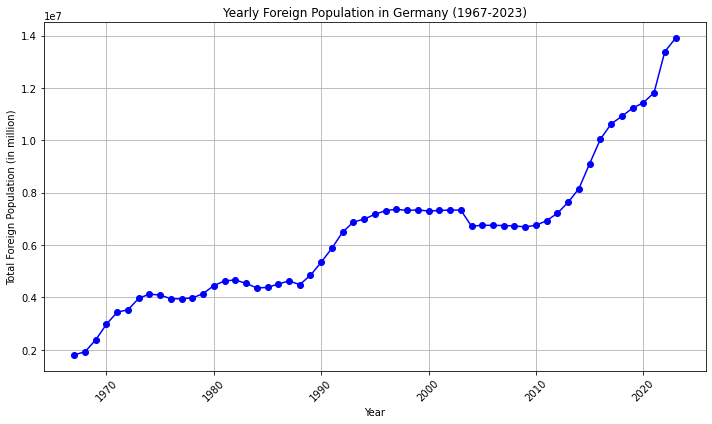

In [8]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Total'], marker='o', color='b', linestyle='-')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Total Foreign Population (in million)')
plt.title('Yearly Foreign Population in Germany (1967-2023)')

# Display the plot
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

As you can see from the graph, the numbers of foreigners coming to Germany increase steadily till 2004, then dropped a bit till 2012, and then started increasing in healthy manner.

### Q.2 Has the gender balance among foreign residents shifted significantly during this period?

In [9]:
# Calculate the total male and female foreign population for each year
total_male_population = df['Male'].sum()
total_female_population = df['Female'].sum()

# Calculate the percentage of male and female foreign population
total_population = total_male_population + total_female_population
male_percentage = (total_male_population / total_population) * 100
female_percentage = (total_female_population / total_population) * 100

print("Percentage of male foreign residents:", male_percentage)
print("Percentage of female foreign residents:", female_percentage)

Percentage of male foreign residents: 54.88330378770024
Percentage of female foreign residents: 45.11669621229976


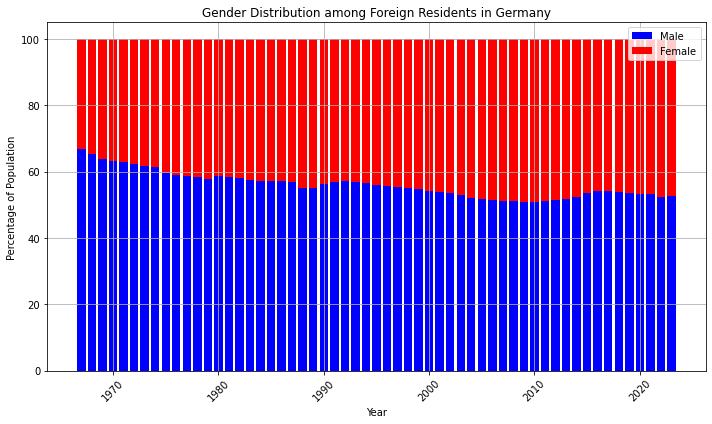

In [10]:
# Calculate the total male and female foreign population for each year
total_population_per_year = df[['Male', 'Female']].sum(axis=1)

# Calculate the percentage of male and female foreign population for each year
df['Male_Percentage'] = (df['Male'] / total_population_per_year) * 100
df['Female_Percentage'] = (df['Female'] / total_population_per_year) * 100

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(df['Year'], df['Male_Percentage'], label='Male', color='blue')
plt.bar(df['Year'], df['Female_Percentage'], bottom=df['Male_Percentage'],
        label='Female', color='red')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Percentage of Population')
plt.title('Gender Distribution among Foreign Residents in Germany')
plt.legend()

# Display the plot
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The male to female ratio in initial years was more than 60:40, but then it has slowly started decreasing since then and it's close to 50:50 since 2004 onwards but the gap has risen to close to 55:45 in recent years.

### Q.3 Are there specific years with a surge in foreigners for either men or women?

In [11]:
# Calculate the difference in foreign population between consecutive years
# for males and females
df['Male_Diff'] = df['Male'].diff()
df['Female_Diff'] = df['Female'].diff()

# Find the year with the maximum increase in male and female population
max_male_increase_year = df.loc[df['Male_Diff'].idxmax(), 'Year']
max_female_increase_year = df.loc[df['Female_Diff'].idxmax(), 'Year']

print("Year with the maximum increase in male population:",
      max_male_increase_year)
print("Year with the maximum increase in female population:",
      max_female_increase_year)

Year with the maximum increase in male population: 2022
Year with the maximum increase in female population: 2022


In [12]:
# Calculate year-to-year percentage change for male and female population

df['Male_Change_Pct'] = df['Male'].pct_change() * 100
df['Female_Change_Pct'] = df['Female'].pct_change() * 100

# Define thresholds based on quartiles
thresholds = df[['Male_Change_Pct', 'Female_Change_Pct']].quantile(
    [0.25, 0.75])


# Define a function to categorize growth based on thresholds
def categorize_growth(change_pct, thresholds):
    if change_pct <= 5:
        return "Low Growth"
    elif change_pct <= 15:
        return "Medium Growth"
    else:
        return "High Growth"


# Apply categorization function to create new columns
df['Male_Growth_Category'] = df['Male_Change_Pct'].apply(categorize_growth, thresholds=thresholds.iloc[0])
df['Female_Growth_Category'] = df['Female_Change_Pct'].apply(categorize_growth, thresholds=thresholds.iloc[1])

# Print a sample of the resulting DataFrame
print(df[['Year', 'Male_Growth_Category', 'Female_Growth_Category']].head())

   Year Male_Growth_Category Female_Growth_Category
1  1967          High Growth            High Growth
2  1968           Low Growth          Medium Growth
3  1969          High Growth            High Growth
4  1970          High Growth            High Growth
5  1971        Medium Growth            High Growth


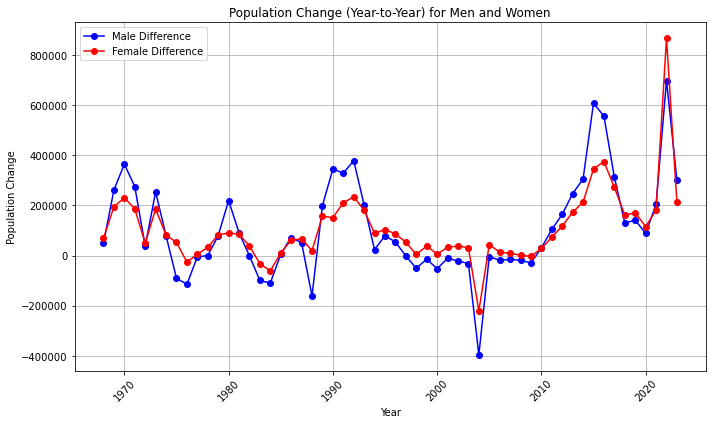

In [13]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Male_Diff'], marker='o', color='blue',
         label='Male Difference')
plt.plot(df['Year'], df['Female_Diff'], marker='o', color='red',
         label='Female Difference')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Population Change')
plt.title('Population Change (Year-to-Year) for Men and Women')
plt.legend()

# Display the plot
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The year 2022 saw the highest surge in people coming to Germany, it could be attributed to covid relaxations.

### Q.4 Are there decades where one gender consistently came to Germany at a higher rate than the other?

In [14]:
# Group the data by decade and calculate the total
# male and female foreign population for each decade
decade_data = df.groupby((df['Year'] // 10) * 10).sum()

# Calculate the percentage of male and female
# foreign population for each decade
decade_data['Male_Percentage'] = (decade_data['Male'] / (decade_data['Male']
                                  + decade_data['Female'])) * 100
decade_data['Female_Percentage'] = (decade_data['Female'] /
                        (decade_data['Male'] + decade_data['Female'])) * 100

print(decade_data[['Male_Percentage', 'Female_Percentage']])

      Male_Percentage  Female_Percentage
Year                                    
1960        65.196190          34.803810
1970        60.366944          39.633056
1980        57.114172          42.885828
1990        56.025011          43.974989
2000        52.398685          47.601315
2010        52.883905          47.116095
2020        52.880134          47.119866


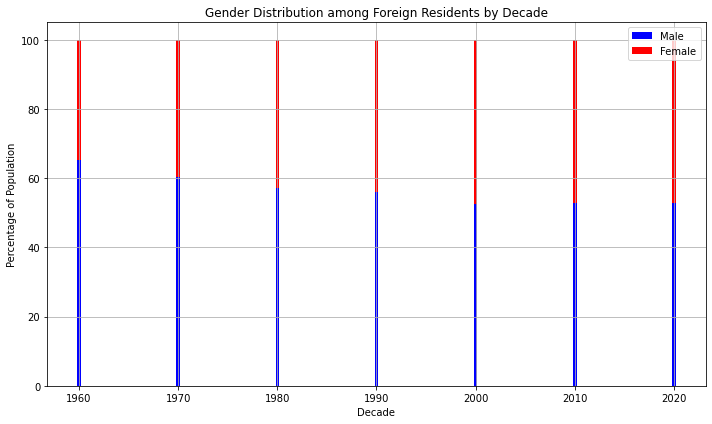

In [15]:
# Plotting the data
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = decade_data.index
plt.bar(index, decade_data['Male_Percentage'], bar_width,
        label='Male', color='blue')
plt.bar(index, decade_data['Female_Percentage'], bar_width,
        bottom=decade_data['Male_Percentage'], label='Female', color='red')

# Adding labels and title
plt.xlabel('Decade')
plt.ylabel('Percentage of Population')
plt.title('Gender Distribution among Foreign Residents by Decade')
plt.xticks(index, index)
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In 1960s and 1970s, there was upto 20% difference between male and female population, but it has came to 10% in 2020s. It was about equal in early 2000.

### Q.5 Identify the top 5 years with the highest total foreign population.

In [31]:
df_sorted = df.sort_values(by='Total', ascending=False)
top_5_years = df_sorted.head(5)
print("Top 5 Years with Most Foreigners:")
print(top_5_years[['Year', 'Total']])

Top 5 Years with Most Foreigners:
    Year     Total
57  2023  13895865
56  2022  13383910
55  2021  11817790
54  2020  11432460
53  2019  11228300


As expected, the trend of increase population is folllowed i.e. as the years progress from 2019 to 2023, the total number of foreigners is also increasing. It's surprising that even in cvid years, there wasn't any decrease in foreign population.

## Summary

This analysis explores trends in foreign residents of Germany using data on male and female populations from 1967 to 2023. We found out that about the numbers of foreigners coming to Germany and what was growth percentage per year. We also explored male to female ration to see what was the distribution of people coming to germany and the trend in male to female ration. Additionally, we examined which year had the most increase in population spike and we found out that it was in year 2022 and most likely reason for it was covid restriction being removed.






## References & additional resources

Dataset: "51000-0007: Aus- und Einfuhr (Außenhandel): Deutschland, Jahre, Länder,
Warensystematik", [Statistisches Bundesamt Deutschland](https://www-genesis.destatis.de/genesis//online?operation=table&code=12521-0001&bypass=true&levelindex=0&levelid=1714947487085#abreadcrumb), Accessed in May 2024.